In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import datetime
import os
import jwt
import uuid
import hashlib
from urllib.parse import urlencode
import requests

In [2]:
url = "https://api.upbit.com/v1/market/all"
querystring = {"isDetails":"false"}
response = requests.request("GET", url, params=querystring)
market = response.json()
for i in market:
    if i['korean_name'] == '엔진코인':
        if 'KRW' in i['market'] :
            pair = i['market']
#KRW-ENJ

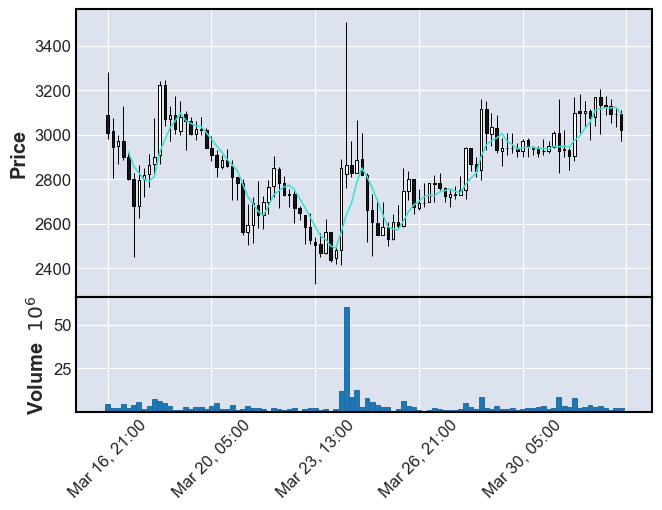

In [23]:
url = "https://api.upbit.com/v1/candles/minutes/240"
querystring = {"market":pair,"count":200}
response = requests.request("GET", url, params=querystring)
minutes = response.json()
enjin_df = pd.DataFrame(columns=['Open','High','Low','Close','Volume'])
for idx in reversed(minutes):
    enjin_df.loc[datetime.datetime.strptime(idx['candle_date_time_kst'],'%Y-%m-%dT%H:%M:%S')] = [idx['opening_price'],idx['high_price'],idx['low_price'],idx['trade_price'],idx['candle_acc_trade_volume']]

mpf.plot(enjin_df[100:],type='candle',mav=5,volume=True)

In [4]:
mav5 = []

for i in range(len(enjin_df)):
    if i < 4 :
        mav5.append(0)
    else:
        mav5.append((enjin_df.iloc[i-4]['Close']+enjin_df.iloc[i-3]['Close']+enjin_df.iloc[i-2]['Close']+enjin_df.iloc[i-1]['Close']+enjin_df.iloc[i]['Close']) / 5)

In [ ]:
#https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
#https://github.com/matplotlib/mplfinance

In [22]:


access_key = os.environ['UPBIT_OPEN_API_ACCESS_KEY']
secret_key = os.environ['UPBIT_OPEN_API_SECRET_KEY']


query = {
    'market': pair,
    'side': 'ask',
    'volume': '2',
    'price': '4000',
    'ord_type': 'limit',
}
query_string = urlencode(query).encode()

m = hashlib.sha512()
m.update(query_string)
query_hash = m.hexdigest()

payload = {
    'access_key': access_key,
    'nonce': str(uuid.uuid4()),
    'query_hash': query_hash,
    'query_hash_alg': 'SHA512',
}

jwt_token = jwt.encode(payload, secret_key)
authorize_token = 'Bearer {}'.format(jwt_token)
headers = {"Authorization": authorize_token}

res = requests.post('https://api.upbit.com' + "/v1/orders", params=query, headers=headers)
print(res.json())

{'uuid': '9229d11f-c0ba-48a6-b50c-bfb1e701b26a', 'side': 'ask', 'ord_type': 'limit', 'price': '4000.0', 'state': 'wait', 'market': 'KRW-ENJ', 'created_at': '2021-04-02T10:55:21+09:00', 'volume': '2.0', 'remaining_volume': '2.0', 'reserved_fee': '0.0', 'remaining_fee': '0.0', 'paid_fee': '0.0', 'locked': '2.0', 'executed_volume': '0.0', 'trades_count': 0}


In [19]:


access_key = os.environ['UPBIT_OPEN_API_ACCESS_KEY']
secret_key = os.environ['UPBIT_OPEN_API_SECRET_KEY']


query = {
    'state': 'done',
}
query_string = urlencode(query).encode()

m = hashlib.sha512()
m.update(query_string)
query_hash = m.hexdigest()

payload = {
    'access_key': access_key,
    'nonce': str(uuid.uuid4()),
    'query_hash': query_hash,
    'query_hash_alg': 'SHA512',
}

jwt_token = jwt.encode(payload, secret_key)
authorize_token = 'Bearer {}'.format(jwt_token)
headers = {"Authorization": authorize_token}

res = requests.get('https://api.upbit.com' + "/v1/orders", params=query, headers=headers)
print(res.json())

[{'uuid': '9addaec1-e2be-4a51-b249-ee15286a943c', 'side': 'bid', 'ord_type': 'limit', 'price': '2870.0', 'state': 'done', 'market': 'KRW-ENJ', 'created_at': '2021-03-25T00:16:28+09:00', 'volume': '348.25792678', 'remaining_volume': '0.0', 'reserved_fee': '499.7501249293', 'remaining_fee': '0.0', 'paid_fee': '499.7501249293', 'locked': '0.0', 'executed_volume': '348.25792678', 'trades_count': 2}, {'uuid': '08de8eb9-6224-4130-b140-4a3389f00415', 'side': 'bid', 'ord_type': 'limit', 'price': '68195000.0', 'state': 'done', 'market': 'KRW-BTC', 'created_at': '2021-03-21T10:12:11+09:00', 'volume': '0.00030239', 'remaining_volume': '0.0', 'reserved_fee': '10.310743025', 'remaining_fee': '0.0', 'paid_fee': '10.310743025', 'locked': '0.0', 'executed_volume': '0.00030239', 'trades_count': 1}, {'uuid': 'aae51c75-dd56-47c5-a949-bc669d6d82be', 'side': 'ask', 'ord_type': 'limit', 'price': '11900.0', 'state': 'done', 'market': 'KRW-AQT', 'created_at': '2021-03-21T01:16:27+09:00', 'volume': '1.73469008